<a href="https://colab.research.google.com/github/Rabby3075/lung_cancer_classification/blob/main/lung_cancer_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# **Data Loading**

In [153]:
images = np.load('images_data.npy')
labels = np.load('labels.npy')


(28, 28)


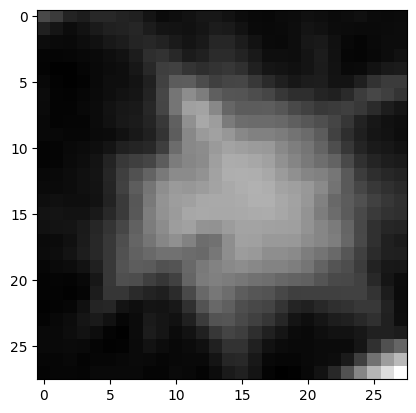

In [154]:
plt.imshow(images[0],cmap='gray')
print(images[0].shape)

# **Showing Image and Label Array**

In [161]:
print(images[0])

[[ 66.  54.  33.  28.  37.  38.  33.  30.  20.  12.  15.  18.  22.  22.
   18.  13.  10.   9.  12.  13.  16.  15.  12.  14.  16.  12.  11.  12.]
 [ 31.  21.  13.  18.  25.  30.  32.  35.  27.  20.  19.  17.  21.  27.
   25.  18.  11.  10.  11.  14.  20.  17.  13.  12.  11.  11.  12.  13.]
 [ 13.  11.  10.  14.  17.  23.  27.  34.  36.  32.  25.  20.  24.  35.
   35.  27.  18.  11.  10.  14.  22.  24.  16.   9.   7.  10.  13.  13.]
 [  7.   7.   8.   9.  11.  15.  18.  27.  42.  46.  37.  26.  30.  40.
   40.  33.  24.  15.  15.  14.  20.  27.  17.   8.   7.   9.  13.  17.]
 [  6.   3.   3.   7.  10.  13.  15.  22.  38.  56.  60.  48.  42.  47.
   50.  45.  31.  21.  19.  16.  20.  26.  18.  10.  11.  18.  24.  26.]
 [  9.   5.   3.   5.  10.  15.  15.  19.  31.  59.  82.  83.  68.  57.
   62.  63.  51.  39.  29.  22.  27.  28.  19.  19.  29.  46.  54.  54.]
 [ 12.   6.   5.   8.  11.  15.  18.  21.  33.  63. 104. 125. 111.  85.
   76.  75.  69.  63.  50.  42.  42.  34.  30.  39.  55.  

# **Testing**

In [73]:
print(images.shape)

(1000, 28, 28)


In [74]:
print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [75]:
print(len(images))

1000


In [76]:
print(len(labels))

1000


In [77]:
labels[0]

array([0., 1.])

# **Scalling**

In [162]:
images = images/255
print(images[0])

[[0.25882353 0.21176471 0.12941176 0.10980392 0.14509804 0.14901961
  0.12941176 0.11764706 0.07843137 0.04705882 0.05882353 0.07058824
  0.08627451 0.08627451 0.07058824 0.05098039 0.03921569 0.03529412
  0.04705882 0.05098039 0.0627451  0.05882353 0.04705882 0.05490196
  0.0627451  0.04705882 0.04313725 0.04705882]
 [0.12156863 0.08235294 0.05098039 0.07058824 0.09803922 0.11764706
  0.1254902  0.1372549  0.10588235 0.07843137 0.0745098  0.06666667
  0.08235294 0.10588235 0.09803922 0.07058824 0.04313725 0.03921569
  0.04313725 0.05490196 0.07843137 0.06666667 0.05098039 0.04705882
  0.04313725 0.04313725 0.04705882 0.05098039]
 [0.05098039 0.04313725 0.03921569 0.05490196 0.06666667 0.09019608
  0.10588235 0.13333333 0.14117647 0.1254902  0.09803922 0.07843137
  0.09411765 0.1372549  0.1372549  0.10588235 0.07058824 0.04313725
  0.03921569 0.05490196 0.08627451 0.09411765 0.0627451  0.03529412
  0.02745098 0.03921569 0.05098039 0.05098039]
 [0.02745098 0.02745098 0.03137255 0.035294

# **# Preporocessing**


In [80]:
import cv2
preprocessed_images = []
for img in images:
    # Check number of channels
    if len(img.shape) == 3 and img.shape[2] == 3:  # Check if RGB image
        # Convert RGB image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        gray_img = img  # If already grayscale, no need to convert
    # Resize image to 52x52
    resized_img = cv2.resize(gray_img, (52, 52))
    preprocessed_images.append(resized_img)

# Convert list to NumPy array
preprocessed_images = np.array(preprocessed_images)
print("Shape of preprocessed images array:", preprocessed_images.shape)

Shape of preprocessed images array: (1000, 52, 52)


# **Comparing Between Original Image & Preprocessing Image**

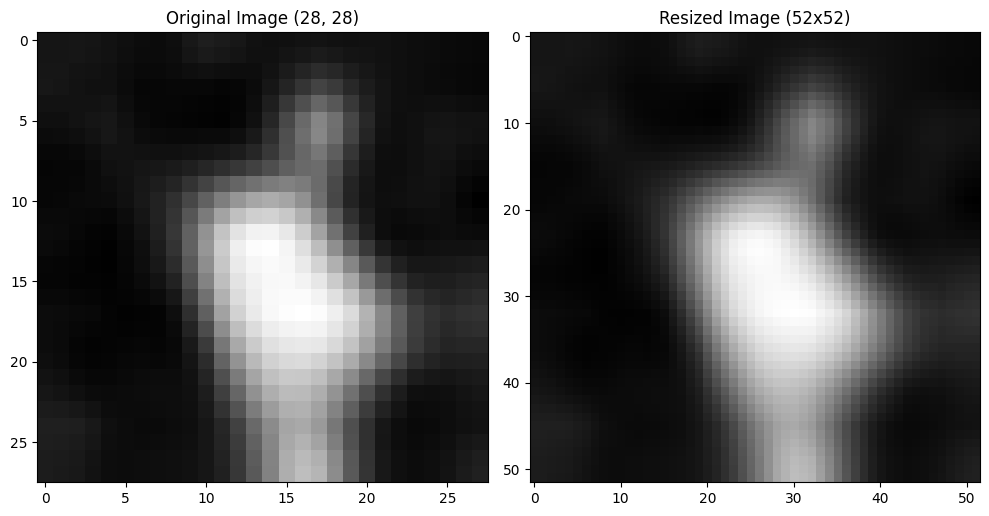

In [83]:
index = 200
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(images[index], cmap='gray')
plt.title(f'Original Image {original_image.shape}')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(preprocessed_images[index], cmap='gray')
plt.title('Resized Image (52x52)')
plt.axis('on')

plt.tight_layout()
plt.show()

# **Train Test Splitting**

In [84]:
from sklearn.model_selection import train_test_split
test_size = 0.2  # Adjust the test size as needed (e.g., 0.2 for 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, labels, test_size=test_size, random_state=42)

# Print the shapes of the training and testing sets
print(f"Training images shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing images shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

Training images shape: (800, 52, 52), Training labels shape: (800, 2)
Testing images shape: (200, 52, 52), Testing labels shape: (200, 2)


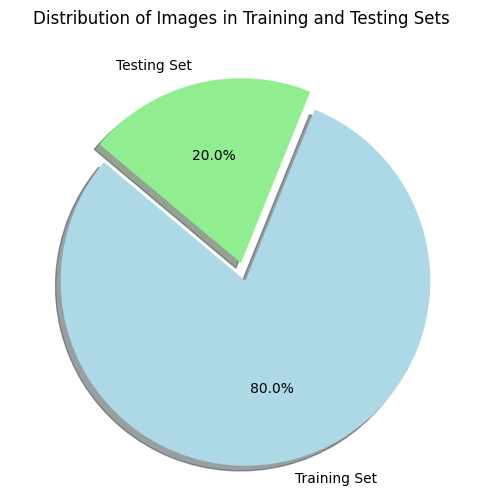

In [85]:
import matplotlib.pyplot as plt

# Calculate the number of images in training and testing sets
num_train_images = X_train.shape[0]
num_test_images = X_test.shape[0]

# Create a pie chart
labels = ['Training Set', 'Testing Set']
sizes = [num_train_images, num_test_images]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode the 1st slice (Training Set)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Images in Training and Testing Sets')
plt.show()


# **Model 1**

In [105]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
cnn_model1 = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(52, 52, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    # Fully connected layers
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # Output layer with softmax for binary classification
])
cnn_model1.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy for binary classification
              metrics=['accuracy'])
cnn_model1.summary()

# Train the model
history = cnn_model1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model1.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 50, 50, 32)        320       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 25, 25, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 11, 11, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 flatten_19 (Flatten)        (None, 5184)            

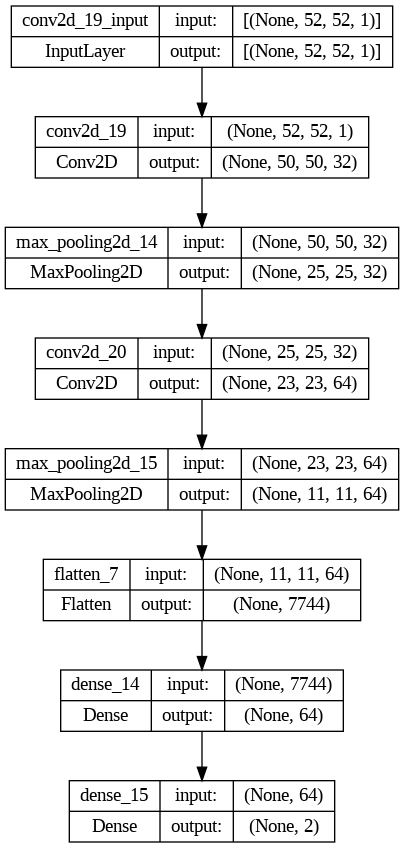

In [163]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [106]:
from pathlib import Path
# Save neural network structure
model_structure = cnn_model1.to_json()
f = Path("cnn1_model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
cnn_model1.save_weights("cnn1_model_weights.h5")


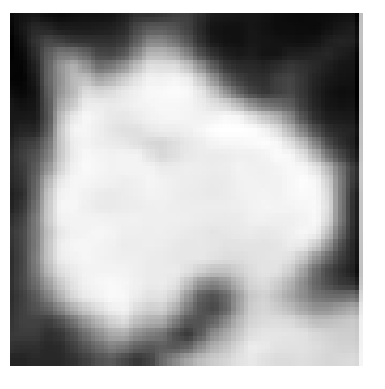

1/1 [==============================] - 0s 254ms/step
Predicted Class: Malignant


In [145]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image


# Load the model structure and weights
model_structure = "cnn1_model_structure.json"
model_weights = "cnn1_model_weights.h5"

with open(model_structure, "r") as f:
    loaded_model = model_from_json(f.read())

loaded_model.load_weights(model_weights)

# Preprocess the uploaded image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(52, 52), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Path to the uploaded image
uploaded_image_path = "malignant_data1.PNG"

# Preprocess the uploaded image
processed_image = preprocess_image(uploaded_image_path)
img = cv2.imread(uploaded_image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()
# Make predictions
predictions = loaded_model.predict(processed_image)

# Get the predicted class (malignant or benign)
predicted_class = "Malignant" if predictions[0][0] > 0.5 else "Benign"
print(f"Predicted Class: {predicted_class}")


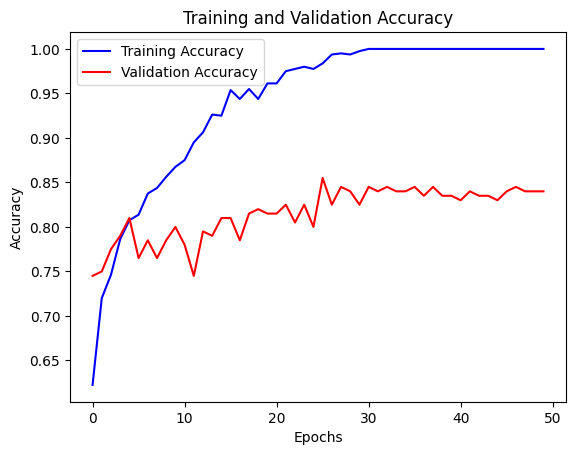

In [164]:
import matplotlib.pyplot as plt

# Extract the training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy curve
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


7/7 [==============================] - 0s 31ms/step


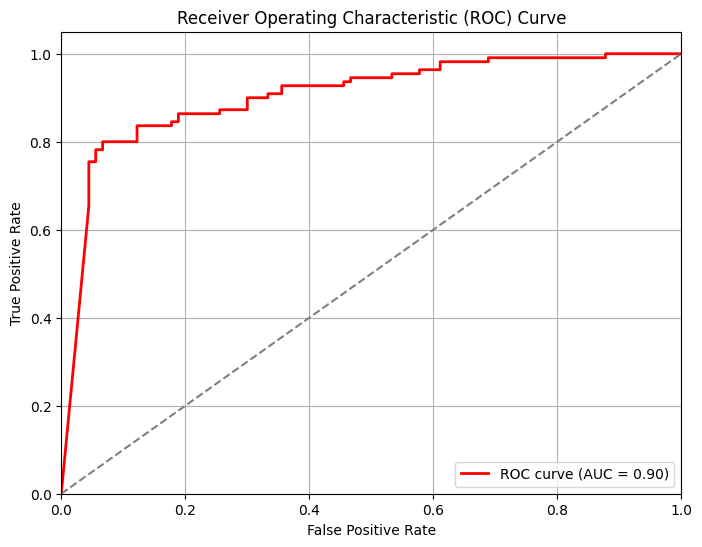

In [132]:
from sklearn.metrics import roc_curve, auc

# Generate predictions
y_pred_prob = cnn_model1.predict(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


7/7 [==============================] - 0s 42ms/step


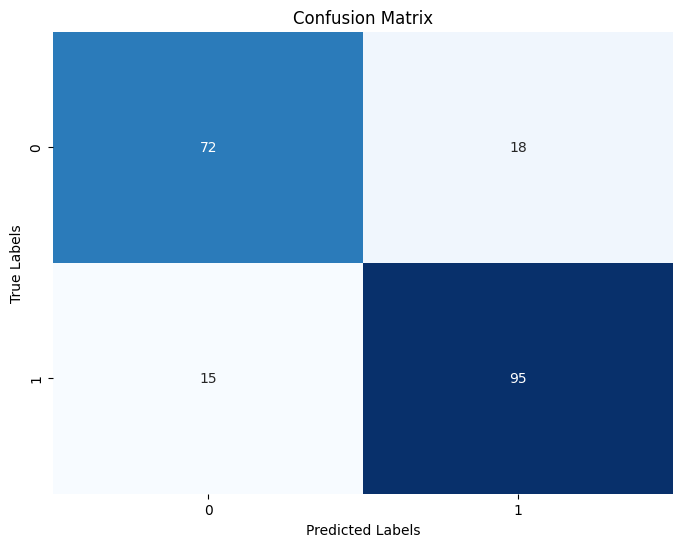

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict classes for the test set
y_pred = np.argmax(cnn_model1.predict(X_test), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [166]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate predictions (probabilities)
y_pred_prob = cnn_model1.predict(X_test)

# Convert probabilities to predicted classes based on a threshold
y_pred = (y_pred_prob[:, 1] > 0.5).astype(int)  # Assuming class 1 is malignant

# Calculate precision, recall, and F1-score
precision = precision_score(y_test[:, 1], y_pred)
recall = recall_score(y_test[:, 1], y_pred)
f1 = f1_score(y_test[:, 1], y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


7/7 [==============================] - 1s 106ms/step
Precision: 0.87
Recall: 0.84
F1-score: 0.85


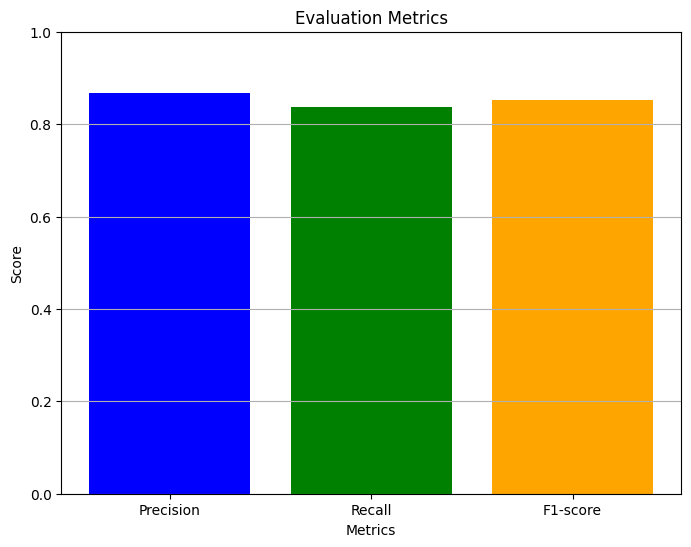

In [167]:
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)  # Set the y-axis limit to show scores between 0 and 1
plt.grid(axis='y')  # Add grid lines along the y-axis
plt.show()


# **Model For Testing**

In [146]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image data and labels
images = np.load('images_data.npy')
labels = np.load('labels.npy')

# Display the size of the dataset
dataset_size = len(images)
print(f"Dataset Size: {dataset_size} images")

# Display some sample images
num_samples = 2  # Number of sample images to display
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    print(labels[i])
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[i], cmap='gray')  # Assuming images are grayscale
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-146-735d64d21829>, line 16)

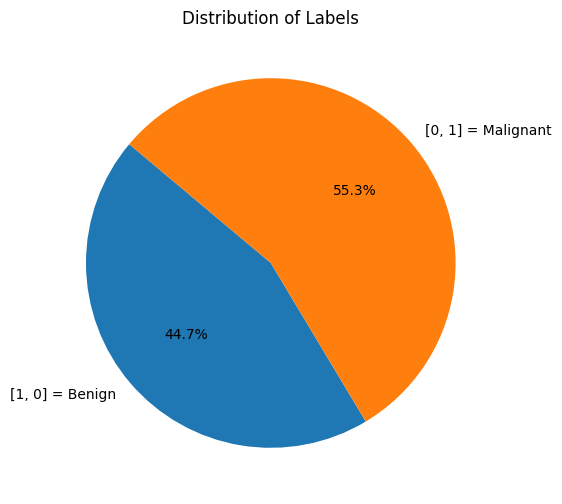

In [157]:
import numpy as np
import matplotlib.pyplot as plt

# Load the labels
labels = np.load('labels.npy')

# Count the occurrences of [1, 0] and [0, 1]
count_10 = np.sum(np.all(labels == [1, 0], axis=1))
count_01 = np.sum(np.all(labels == [0, 1], axis=1))

# Pie chart data
sizes = [count_10, count_01]
labels = ['[1, 0] = Benign', '[0, 1] = Malignant']

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.show()


Dataset Size: 1000 images
Image Shape: (28, 28)


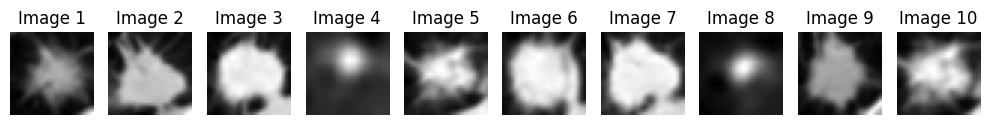

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image data
images = np.load('images_data.npy')

# Display the size of the dataset and image shape
dataset_size = len(images)
image_shape = images.shape[1:]  # Exclude the batch size from shape
print(f"Dataset Size: {dataset_size} images")
print(f"Image Shape: {image_shape}")

# Display some sample images
num_samples = 10  # Number of sample images to display
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[i], cmap='gray')  # Assuming images are grayscale
    plt.title(f'Image {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


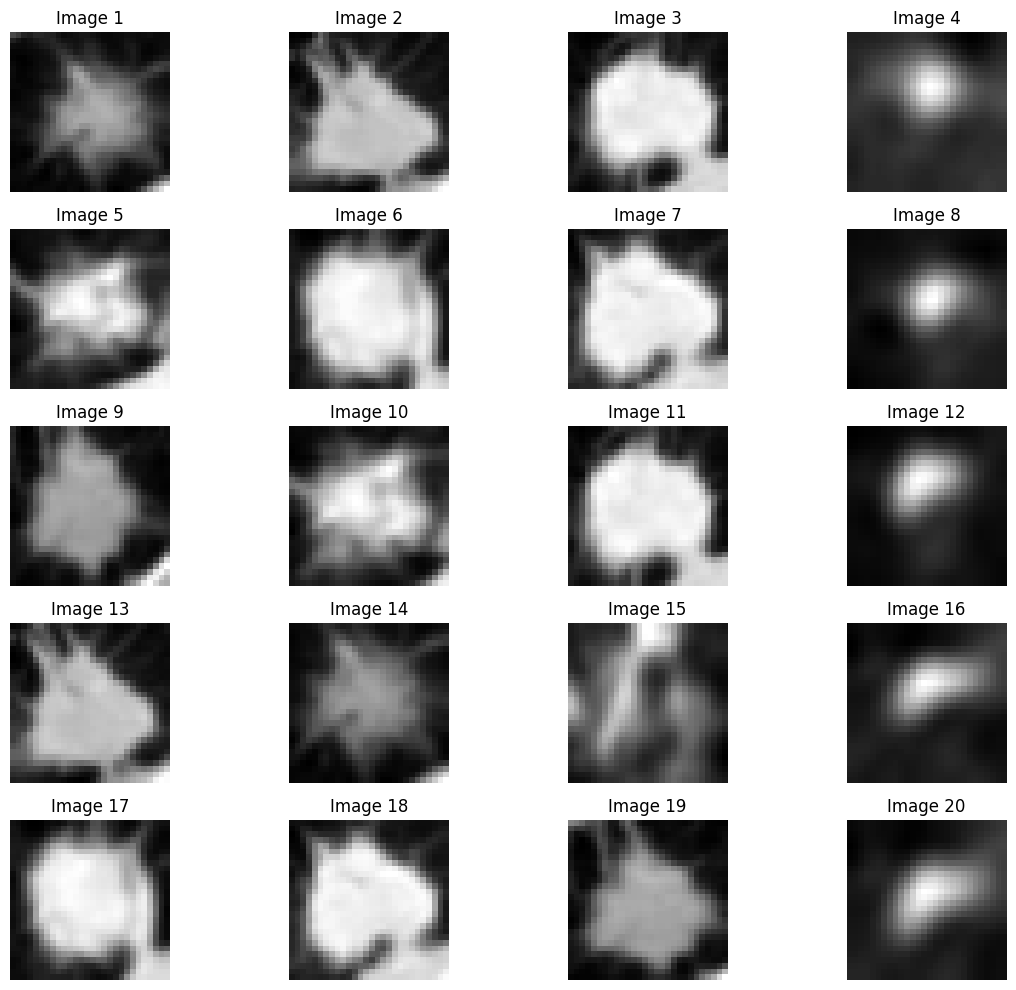

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image data
images = np.load('images_data.npy')

# Define the number of rows and columns for the grid
num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

# Create a figure and axes for the grid of images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Display the images in the grid
for i in range(num_images):
    axes[i].imshow(images[i], cmap='gray')  # Assuming images are grayscale
    axes[i].axis('off')  # Turn off axis
    axes[i].set_title(f'Image {i+1}')

plt.tight_layout()
plt.show()
